In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math
import json #to write dict with parameters

import GrowYourIC
from GrowYourIC import positions, geodyn, geodyn_trg, geodyn_static, plot_data, data

plt.rcParams['figure.figsize'] = (8.0, 3.0) #size of figures
cm = plt.cm.get_cmap('viridis')
cm2 = plt.cm.get_cmap('winter')

In [2]:
print("==== Models ====")

age_ic_dim = 1e9 #in years
rICB_dim = 1221. #in km

velocity_center = [0., 100.]#center of the eastern hemisphere
center = [0,-80] #center of the western hemisphere

units = None #we give them already dimensionless parameters. 
rICB = 1.
age_ic = 1.


#Slow translation 
v_slow = 0.8
omega_slow = 1.57
exponent_slow = 1.
velocity_slow = geodyn_trg.translation_velocity(velocity_center, v_slow)
proxy_type = "growth rate"#"growth rate"
proxy_name = "growth rate (km/Myears)" #growth rate (km/Myears)"
proxy_lim = None

print("=== Model 1 : slow translation, no rotation ===")


SlowTranslation = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_slow,
              'exponent_growth': exponent_slow,
              'omega': 0.,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
SlowTranslation.set_parameters(parameters)
SlowTranslation.define_units()

print("=== Model 2 : slow translation, rotation ===")


SlowTranslation2 = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_slow,
              'exponent_growth': exponent_slow,
              'omega': omega_slow,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
SlowTranslation2.set_parameters(parameters)
SlowTranslation2.define_units()

#Fast translation
v_fast = 10.3
omega_fast = 7.85
time_translation = rICB_dim*1e3/4e-10/(np.pi*1e7)
maxAge = 2.*time_translation/1e6
velocity_fast = geodyn_trg.translation_velocity(velocity_center, v_fast)
exponent_fast = 0.1

proxy_type = "age"
proxy_name = "age (Myears)" #growth rate (km/Myears)"
proxy_lim = [0, maxAge]

print("=== Model 3 : fast translation, no rotation ===")


FastTranslation = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_fast,
              'exponent_growth': exponent_fast,
              'omega': 0.,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
FastTranslation.set_parameters(parameters)
FastTranslation.define_units()

print("=== Model 4 : fast translation, rotation ===")

FastTranslation2 = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_fast,
              'exponent_growth': exponent_fast,
              'omega': omega_fast,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
FastTranslation2.set_parameters(parameters)
FastTranslation2.define_units()


==== Models ====
=== Model 1 : slow translation, no rotation ===
=== Model 2 : slow translation, rotation ===
=== Model 3 : fast translation, no rotation ===
=== Model 4 : fast translation, rotation ===


===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 2724


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 2724
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 2724
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 2724
===


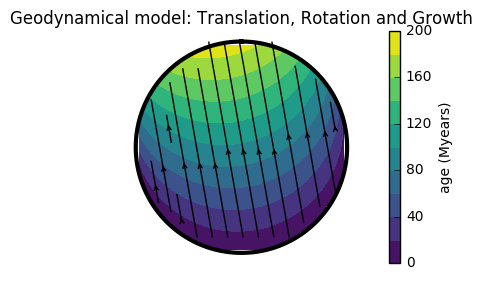

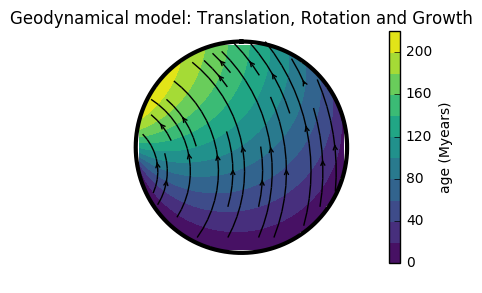

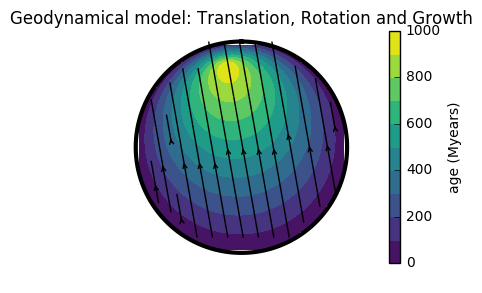

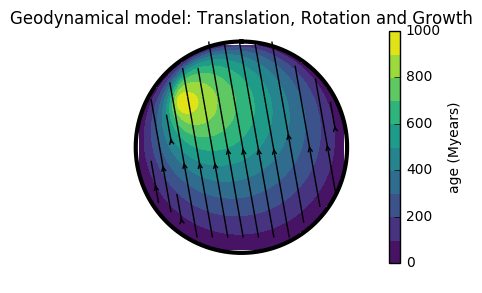

In [3]:
npoints = 60 #number of points in the x direction for the data set. 
data_set = data.PerfectSamplingEquator(npoints, rICB = 1.)
data_set.method = "bt_point"

proxy = geodyn.evaluate_proxy(data_set, FastTranslation, proxy_type="age", verbose = False)
data_set.plot_c_vec(FastTranslation, proxy=proxy, cm=cm, nameproxy="age (Myears)")
proxy = geodyn.evaluate_proxy(data_set, FastTranslation2, proxy_type="age", verbose = False)
data_set.plot_c_vec(FastTranslation2, proxy=proxy, cm=cm, nameproxy="age (Myears)")
proxy = geodyn.evaluate_proxy(data_set, SlowTranslation, proxy_type="age", verbose = False)
data_set.plot_c_vec(SlowTranslation, proxy=proxy, cm=cm, nameproxy="age (Myears)")
proxy = geodyn.evaluate_proxy(data_set, SlowTranslation2, proxy_type="age", verbose = False)
data_set.plot_c_vec(SlowTranslation, proxy=proxy, cm=cm, nameproxy="age (Myears)")

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling at the surface
= Proxy is evaluated for bt_point
= Number of points to examine: 2500


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling at the surface
= Proxy is evaluated for bt_point
= Number of points to examine: 2500
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Perfect sampling at the surface
= Proxy is evaluated for bt_point
= Number of points to examine: 2500
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Perfect sampling at the surface
= Proxy is evaluated for bt_point
= Number of points to examine: 2500
===


/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


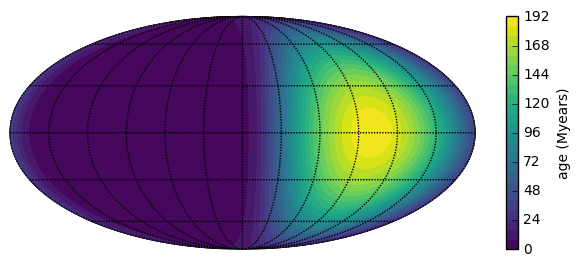

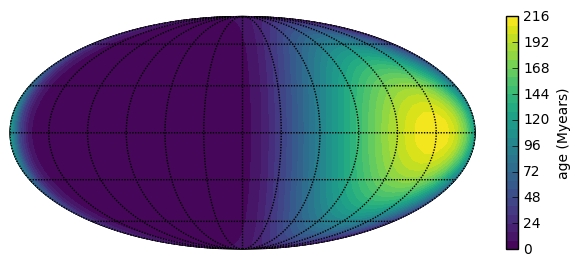

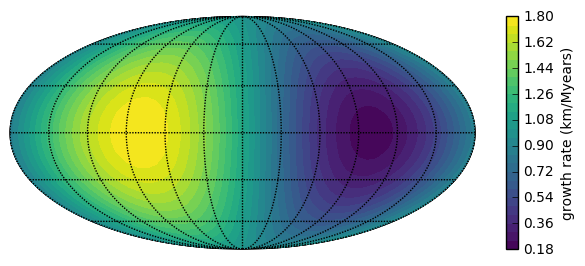

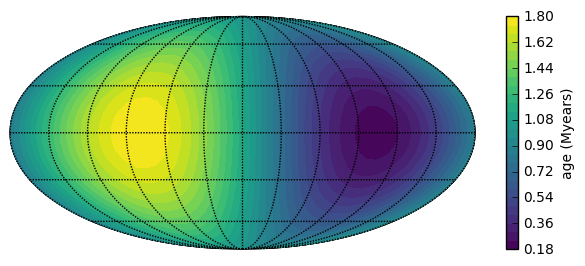

In [7]:
npoints = 50 #number of points in the x direction for the data set. 
data_set = data.PerfectSamplingSurface(npoints, rICB = 1., depth=0.01)
data_set.method = "bt_point"


surface1 = geodyn.evaluate_proxy(data_set, FastTranslation, proxy_type=FastTranslation.proxy_type, verbose = False)
surface2 = geodyn.evaluate_proxy(data_set, FastTranslation2, proxy_type=FastTranslation2.proxy_type, verbose = False)
surface3 = geodyn.evaluate_proxy(data_set, SlowTranslation, proxy_type=SlowTranslation.proxy_type, verbose = False)
surface4 = geodyn.evaluate_proxy(data_set, SlowTranslation2, proxy_type=SlowTranslation2.proxy_type, verbose = False)


X, Y, Z  = data_set.mesh_TPProxy(surface1)
## map
m, fig = plot_data.setting_map()
y, x = m(Y, X)
sc = m.contourf(y, x, Z, 30, cmap=cm, zorder=2, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(FastTranslation.proxy_name)

X, Y, Z  = data_set.mesh_TPProxy(surface2)
## map
m, fig = plot_data.setting_map()
y, x = m(Y, X)
sc = m.contourf(y, x, Z, 30, cmap=cm, zorder=2, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(FastTranslation2.proxy_name)

X, Y, Z  = data_set.mesh_TPProxy(surface3)
## map
m, fig = plot_data.setting_map()
y, x = m(Y, X)
sc = m.contourf(y, x, Z, 30, cmap=cm, zorder=2, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(SlowTranslation.proxy_name)

X, Y, Z  = data_set.mesh_TPProxy(surface4)
## map
m, fig = plot_data.setting_map()
y, x = m(Y, X)
sc = m.contourf(y, x, Z, 30, cmap=cm, zorder=2, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(SlowTranslation2.proxy_name)

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 22500


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 22500
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 22500
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 22500
===


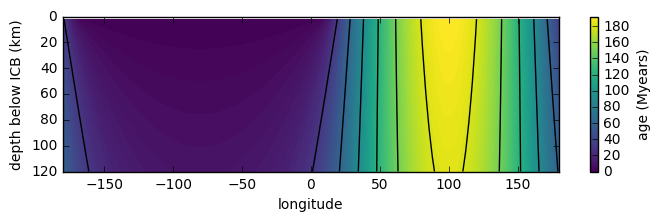

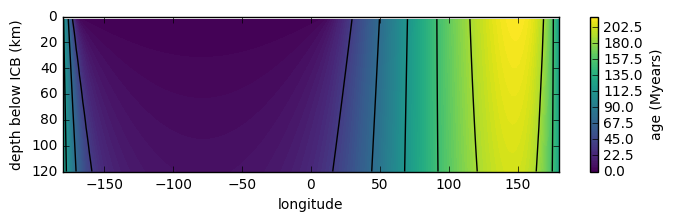

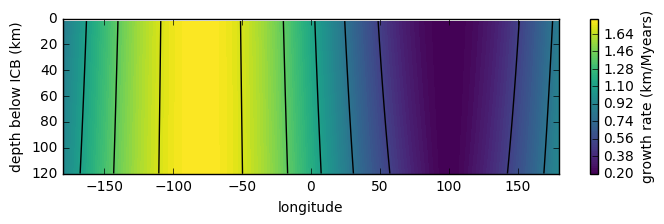

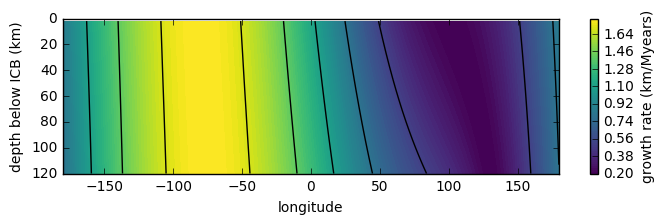

In [9]:
# perfect repartition in depth (for meshgrid plots)
data_meshgrid = data.Equator_upperpart(150,150)
data_meshgrid.method = "bt_point"

meshgrid1 = geodyn.evaluate_proxy(data_meshgrid, FastTranslation, verbose = False)
meshgrid2 = geodyn.evaluate_proxy(data_meshgrid, FastTranslation2, verbose = False)
meshgrid3 = geodyn.evaluate_proxy(data_meshgrid, SlowTranslation,  verbose = False)
meshgrid4 = geodyn.evaluate_proxy(data_meshgrid, SlowTranslation2, verbose = False)

fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(meshgrid1)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
cbar.set_label(FastTranslation.proxy_name)
ax3.set_xlabel("longitude")
ax3.set_ylabel("depth below ICB (km)")

fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(meshgrid2)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
cbar.set_label(FastTranslation2.proxy_name)
ax3.set_xlabel("longitude")
ax3.set_ylabel("depth below ICB (km)")

fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(meshgrid3)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
cbar.set_label(SlowTranslation.proxy_name)
ax3.set_xlabel("longitude")
ax3.set_ylabel("depth below ICB (km)")

fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(meshgrid4)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
cbar.set_label(SlowTranslation2.proxy_name)
ax3.set_xlabel("longitude")
ax3.set_ylabel("depth below ICB (km)")